<a href="https://colab.research.google.com/github/dmherrera/Automatidata/blob/main/6_Automatidata_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

# Build a machine learning model

1. Create a model capable of predicting whether a customer is likely to tip well

1.  Potentially discriminating against customers who may or may not be good tippers --the model is only making predictions and is not going to be 100% accurate all of the time. It may also backfire and predict someone to be a good tipper and be wrong, leaving the driver unsatisfied.
2.  Yes, only if you as a driver are willing to take that risk. But the data needed to make this model would be of personal nature.
3.Personally, depending on the dataset given. If there's not enough information, then the possibility of creating a succesful model is slim, so why bother with these questionable ethics.
4. Perhaps, determining wheter a drive is going to be more or less expensive could yield similar results.



Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?




1.   A dataset with tip amounts, fare amounts, and trip distance. And if you want to get problematic, a customer id.
2.   tip amount
3. not yet. probably recall




**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from xgboost import plot_importance

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA.

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data (1).csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [ ]:
# Inspect the first few rows of df0
### YOUR CODE HERE ###
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [4]:
# Inspect the first few rows of `nyc_preds_means`
### YOUR CODE HERE ###
nyc_preds_means.head(10)

,Unnamed: 0,mean_duration,mean_distance,predicted_fare
0,0,22.847222,3.521667,13.356119
1,1,24.470370,3.108889,17.247848
2,2,7.250000,0.881429,6.764647
3,3,30.250000,3.700000,19.936521
4,4,14.616667,4.435000,16.399943
5,5,11.855376,2.052258,9.125788
6,6,59.633333,12.830000,46.024644
7,7,26.437500,4.022500,16.475407
8,8,7.873457,1.019259,8.904856
9,9,10.541111,1.580000,12.772916


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [4]:
# Merge datasets
### YOUR CODE HERE ###
nyc_preds_means.drop('Unnamed: 0', axis=1)
df = pd.concat([df0, nyc_preds_means], axis=1)

In [6]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,22.847222,3.521667,13.356119
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1,24.470370,3.108889,17.247848
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,2,7.250000,0.881429,6.764647
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,3,30.250000,3.700000,19.936521
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,4,14.616667,4.435000,16.399943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,22694,8.594643,1.098214,6.022112
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,22695,59.560417,18.757500,52.000000
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,22696,6.609091,0.684242,5.569087
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,22697,16.650000,2.077500,9.916833


### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses.

Call `info()` on the new combined dataframe.

In [ ]:
#==> ENTER YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card.

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [5]:
# Subset the data to isolate only customers who paid by credit card
#==> ENTER YOUR CODE HERE
df1 = df[df['payment_type'] == 1]

In [6]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,22.847222,3.521667,13.356119
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1,24.470370,3.108889,17.247848
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,2,7.250000,0.881429,6.764647
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,3,30.250000,3.700000,19.936521
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,5,11.855376,2.052258,9.125788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,22692,18.016667,5.700000,19.742367
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,22693,8.095370,1.062778,7.878732
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,22695,59.560417,18.757500,52.000000
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,22697,16.650000,2.077500,9.916833


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it.

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  

Round the result to three places beyond the decimal. **This is an important step.** It affects how many customers are labeled as generous tippers. In fact, without performing this step, approximately 1,800 people who do tip ≥ 20% would be labeled as not generous.

To understand why, you must consider how floats work. Computers make their calculations using floating-point arithmetic (hence the word "float"). Floating-point arithmetic is a system that allows computers to express both very large numbers and very small numbers with a high degree of precision, encoded in binary. However, precision is limited by the number of bits used to represent a number, which is generally 32 or 64, depending on the capabilities of your operating system.

This comes with limitations in that sometimes calculations that should result in clean, precise values end up being encoded as very long decimals. Take, for example, the following calculation:


In [ ]:
# Run this cell
1.1 + 2.2

3.3000000000000003

Notice the three that is 16 places to the right of the decimal. As a consequence, if you were to then have a step in your code that identifies values ≤ 3.3, this would not be included in the result. Therefore, whenever you perform a calculation to compute a number that is then used to make an important decision or filtration, round the number. How many degrees of precision you round to is your decision, which should be based on your use case.

Refer to this [guide for more information related to floating-point arithmetic](https://floating-point-gui.de/formats/fp/).  
Refer to this [guide for more information related to fixed-point arithmetic](https://inst.eecs.berkeley.edu/~cs61c/sp06/handout/fixedpt.html), which is an alternative to floating-point arithmetic used in certain cases.

In [7]:
# Create tip % col
#==> ENTER YOUR CODE HERE
df1['tip_percentage'] = (df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])).round(3) * 100

<ipython-input-7-11b34343033f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percentage'] = (df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])).round(3) * 100


In [10]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare,tip_percentage
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,22.847222,3.521667,13.356119,20.0
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1,24.470370,3.108889,17.247848,23.8
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,2,7.250000,0.881429,6.764647,19.9
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,3,30.250000,3.700000,19.936521,30.0
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,5,11.855376,2.052258,9.125788,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,22692,18.016667,5.700000,19.742367,20.0
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,22693,8.095370,1.062778,7.878732,20.0
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,22695,59.560417,18.757500,52.000000,25.0
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,22697,16.650000,2.077500,9.916833,15.0


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [8]:
# Create 'generous' col (target)
#==> ENTER YOUR CODE HERE
df1['generous'] = df1['tip_percentage'].copy()



<ipython-input-8-6c8c769b6b39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percentage'].copy()


In [9]:
df1['generous'] = np.where(df1['generous'] >= 20.0, 1, 0)

<ipython-input-9-9416bad2f27c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = np.where(df1['generous'] >= 20.0, 1, 0)


In [13]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare,tip_percentage,generous
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,22.847222,3.521667,13.356119,20.0,1
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1,24.470370,3.108889,17.247848,23.8,1
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,2,7.250000,0.881429,6.764647,19.9,0
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,3,30.250000,3.700000,19.936521,30.0,1
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,5,11.855376,2.052258,9.125788,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,22692,18.016667,5.700000,19.742367,20.0,1
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,22693,8.095370,1.062778,7.878732,20.0,1
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,22695,59.560417,18.757500,52.000000,25.0,1
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,22697,16.650000,2.077500,9.916833,15.0,0


<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [10]:
# Convert pickup and dropoff cols to datetime
#==> ENTER YOUR CODE HERE
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

<ipython-input-10-7ba4b7a5cfc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
<ipython-input-10-7ba4b7a5cfc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])


Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [11]:
# Create a 'day' col
#==> ENTER YOUR CODE HERE
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

<ipython-input-11-f53d218c19cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


In [16]:
df1['day']

0        saturday
1         tuesday
2          friday
3          sunday
5        saturday
           ...   
22692      sunday
22693    thursday
22695      sunday
22697    saturday
22698    thursday
Name: day, Length: 15265, dtype: object


<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [12]:
from datetime import time

In [13]:
# Create 'am_rush' col
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1['tpep_pickup_datetime'].copy()
df1['am_rush'] = (df1['am_rush'].dt.hour >= 6) & (df1['am_rush'].dt.hour < 10)



<ipython-input-13-2017284f17d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1['tpep_pickup_datetime'].copy()
<ipython-input-13-2017284f17d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = (df1['am_rush'].dt.hour >= 6) & (df1['am_rush'].dt.hour < 10)


In [19]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare,tip_percentage,generous,day,am_rush
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,22.847222,3.521667,13.356119,20.0,1,saturday,True
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1,24.470370,3.108889,17.247848,23.8,1,tuesday,False
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,2,7.250000,0.881429,6.764647,19.9,0,friday,True
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,3,30.250000,3.700000,19.936521,30.0,1,sunday,False
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,5,11.855376,2.052258,9.125788,20.0,1,saturday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,22692,18.016667,5.700000,19.742367,20.0,1,sunday,False
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,22693,8.095370,1.062778,7.878732,20.0,1,thursday,False
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,22695,59.560417,18.757500,52.000000,25.0,1,sunday,False
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,22697,16.650000,2.077500,9.916833,15.0,0,saturday,False


In [14]:
# Create 'daytime' col
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1['tpep_pickup_datetime'].copy()
df1['daytime'] = (df1['daytime'].dt.hour >= 10) & (df1['daytime'].dt.hour < 16)


<ipython-input-14-63db9f9be494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1['tpep_pickup_datetime'].copy()
<ipython-input-14-63db9f9be494>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = (df1['daytime'].dt.hour >= 10) & (df1['daytime'].dt.hour < 16)


In [15]:
df1['pm_rush'] = df1['tpep_pickup_datetime'].copy()
df1['pm_rush'] = (df1['pm_rush'].dt.hour >= 16) & (df1['pm_rush'].dt.hour < 20)

<ipython-input-15-43fc69306fc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1['tpep_pickup_datetime'].copy()
<ipython-input-15-43fc69306fc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = (df1['pm_rush'].dt.hour >= 16) & (df1['pm_rush'].dt.hour < 20)


In [16]:
df1['nighttime'] = df1['tpep_pickup_datetime'].copy()
df1['nighttime'] = (df1['nighttime'].dt.hour >= 20) | (df1['nighttime'].dt.hour < 6)

<ipython-input-16-014e1e8368ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1['tpep_pickup_datetime'].copy()
<ipython-input-16-014e1e8368ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = (df1['nighttime'].dt.hour >= 20) | (df1['nighttime'].dt.hour < 6)


You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [17]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE
df1['am_rush'] = np.where(df1['am_rush'] == False, 0 ,1)
df1['daytime'] = np.where(df1['daytime'] == False, 0, 1)
df1['pm_rush'] = np.where(df1['pm_rush'] == False, 0 ,1)
df1['nighttime']  = np.where(df1['nighttime'] == False, 0 ,1)


<ipython-input-17-785b3c51bb09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = np.where(df1['am_rush'] == False, 0 ,1)
<ipython-input-17-785b3c51bb09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = np.where(df1['daytime'] == False, 0, 1)
<ipython-input-17-785b3c51bb09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

Write functions to convert the three remaining columns and apply them to their respective series.

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [18]:
# Create 'month' col
#==> ENTER YOUR CODE HERE
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

<ipython-input-18-19a67735d4c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [19]:
df1

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare,tip_percentage,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,22.847222,3.521667,13.356119,20.0,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,1,24.470370,3.108889,17.247848,23.8,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,2,7.250000,0.881429,6.764647,19.9,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,3,30.250000,3.700000,19.936521,30.0,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36,5,11.855376,2.052258,9.125788,20.0,1,saturday,0,0,0,1,mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,2017-07-16 03:22:51,2017-07-16 03:40:52,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35,22692,18.016667,5.700000,19.742367,20.0,1,sunday,0,0,0,1,jul
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56,22693,8.095370,1.062778,7.878732,20.0,1,thursday,0,0,0,1,aug
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,22695,59.560417,18.757500,52.000000,25.0,1,sunday,0,0,1,0,aug
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,22697,16.650000,2.077500,9.916833,15.0,0,saturday,0,1,0,0,jul


Examine the first five rows of your dataframe.

In [ ]:
#==> ENTER YOUR CODE HERE
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,Unnamed: 0,mean_duration,mean_distance,predicted_fare,tip_percentage,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0,22.847222,3.521667,13.356119,20.0,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,1,24.470370,3.108889,17.247848,23.8,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,2,7.250000,0.881429,6.764647,19.9,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,3,30.250000,3.700000,19.936521,30.0,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,5,11.855376,2.052258,9.125788,20.0,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [20]:
# Drop columns
#==> ENTER YOUR CODE HERE
df = df1.drop(columns=['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'store_and_fwd_flag', 'payment_type','fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount','improvement_surcharge', 'total_amount' ])


In [21]:
df

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,mean_duration,mean_distance,predicted_fare,tip_percentage,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,100,231,22.847222,3.521667,13.356119,20.0,1,saturday,1,0,0,0,mar
1,1,1,1,186,43,24.470370,3.108889,17.247848,23.8,1,tuesday,0,1,0,0,apr
2,1,1,1,262,236,7.250000,0.881429,6.764647,19.9,0,friday,1,0,0,0,dec
3,2,1,1,188,97,30.250000,3.700000,19.936521,30.0,1,sunday,0,1,0,0,may
5,2,6,1,161,236,11.855376,2.052258,9.125788,20.0,1,saturday,0,0,0,1,mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,1,1,1,249,17,18.016667,5.700000,19.742367,20.0,1,sunday,0,0,0,1,jul
22693,2,1,1,229,170,8.095370,1.062778,7.878732,20.0,1,thursday,0,0,0,1,aug
22695,2,1,2,132,164,59.560417,18.757500,52.000000,25.0,1,sunday,0,0,1,0,aug
22697,2,1,1,68,144,16.650000,2.077500,9.916833,15.0,0,saturday,0,1,0,0,jul


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`.

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [22]:
# 1. Define list of cols to convert to string
#==> ENTER YOUR CODE HERE
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

# 2. Convert each column to string
#==> ENTER YOUR CODE HERE
for col in cols_to_str:
  df[col] = df[col].astype(str)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  object 
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  object 
 3   PULocationID     15265 non-null  object 
 4   DOLocationID     15265 non-null  object 
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   tip_percentage   15262 non-null  float64
 9   generous         15265 non-null  int64  
 10  day              15265 non-null  object 
 11  am_rush          15265 non-null  int64  
 12  daytime          15265 non-null  int64  
 13  pm_rush          15265 non-null  int64  
 14  nighttime        15265 non-null  int64  
 15  month            15265 non-null  object 
dtypes: float64(4), int64(6), object(6)
memory usage: 2.0+ MB



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [23]:
# Convert categoricals to binary
#==> ENTER YOUR CODE HERE
df2 = pd.get_dummies(df, drop_first=True, dtype=int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 348 entries, passenger_count to month_sep
dtypes: float64(4), int64(344)
memory usage: 40.6 MB


In [24]:
df2 = df2.drop('tip_percentage', axis=1)

##### Evaluation metric

Before modeling, you must decide on an evaluation metric.

1. Examine the class balance of your target variable.

In [25]:
# Get class balance of 'generous' col
#==> ENTER YOUR CODE HERE
df2['generous'].value_counts(normalize=True) * 100


generous
1    52.636751
0    47.363249
Name: proportion, dtype: float64

A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

F1 SCORE

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data.

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [26]:
df2 = df2.dropna(axis=0)

In [108]:
df2.head()

,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationID_232,

In [27]:
# Isolate target variable (y)
#==> ENTER YOUR CODE HERE
y = df2['generous']

# Isolate the features (X)
#==> ENTER YOUR CODE HERE
X = df2.drop('generous', axis=1)

# Split into train and test sets
#==> ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.2, random_state = 42)

In [110]:
X.isna().sum()

passenger_count    0
mean_duration      0
mean_distance      0
predicted_fare     0
am_rush            0
                  ..
month_mar          0
month_may          0
month_nov          0
month_oct          0
month_sep          0
Length: 346, dtype: int64

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`  
 - `max_features`  
 - `max_samples`
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a set `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>



In [64]:
# 1. Instantiate the random forest classifier
#==> ENTER YOUR CODE HERE
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
#==> ENTER YOUR CODE HERE
cv_params = {'max_depth': [5],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [3],

             'n_estimators': [300]
             }

# 3. Define a set of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

y = y.dropna(axis=0)

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time.

In [65]:
#==> ENTER YOUR CODE HERE
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [3],
                         'n_estimators': [300]},
             refit='f1', scoring={'accuracy', 'precision', 'recall', 'f1'})

In [113]:
rf_cv.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=0.7,
                       min_samples_leaf=3, n_estimators=300, random_state=42)

,passenger_count,mean_duration,mean_distance,predicted_fare,tip_percentage,am_rush,daytime,pm_rush,nighttime,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationI

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [61]:
import pickle

# Define a path to the folder where you want to save the model
path = '/content/'

In [41]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [59]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

In [114]:
write_pickle(path, rf_cv.best_estimator_, 'RandomForestModelTrue')

In [62]:
read_pickle(path, 'RandomForestModelTrue')

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=0.7,
                       min_samples_leaf=3, n_estimators=300, random_state=42)

Examine the best average score across all the validation folds.

In [66]:
# Examine best score
#==> ENTER YOUR CODE HERE
rf_cv.best_score_

0.7546214548385043

Examine the best combination of hyperparameters.

In [116]:
#==> ENTER YOUR CODE HERE
rf_cv.best_estimator_

RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=0.7,
                       min_samples_leaf=3, n_estimators=300, random_state=42)

In [56]:
cv_params2 = {'max_depth':[5], 'max_features':[1.0], 'max_samples':[0.5],
                       'min_samples_leaf':[2], 'n_estimators':[150],}

In [57]:
rf_best = GridSearchCV(rf, cv_params2, scoring=scoring, cv=5, refit='f1')

In [58]:
rf_best.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.5], 'min_samples_leaf': [2],
                         'n_estimators': [150]},
             refit='f1', scoring={'accuracy', 'recall', 'precision', 'f1'})

In [73]:
#why are my scores so goog? too good to be trusted... test with parameters from exemplar
cv_params3 = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments.

In [74]:
rf_exemplar = GridSearchCV(rf, cv_params3, scoring=scoring, cv=4, refit='f1')

In [75]:
rf_exemplar.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring={'accuracy', 'recall', 'precision', 'f1'})

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [28]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [117]:
#==> ENTER YOUR CODE HERE
make_results('Random Forest True', rf_cv, 'f1')

,model,precision,recall,F1,accuracy
0,Random Forest True,0.695199,0.82654,0.755167,0.717831


In [60]:
make_results('Best Random Forest', rf_best, 'f1')

,model,precision,recall,F1,accuracy
0,Best Random Forest,1.0,1.0,1.0,1.0


In [76]:
make_results('RF Exemplar2', rf_exemplar, 'f1')

,model,precision,recall,F1,accuracy
0,RF Exemplar2,1.0,1.0,1.0,1.0


Your results should produce an acceptable model across the board. Typically scores of 0.65 or better are considered acceptable, but this is always dependent on your use case. Optional: try to improve the scores. It's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `rf_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

==> ENTER YOUR RESPONSE HERE

In [67]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
rf_preds = rf_cv.predict(X_test)

In [77]:
rf_exemplar_preds = rf_exemplar.best_estimator_.predict(X_test)

Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [29]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [69]:
 # Get scores on test data
#==> ENTER YOUR CODE HERE
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)

In [70]:
rf_test_scores

,model,precision,recall,F1,accuracy
0,RF test,0.686244,0.828874,0.750846,0.710449


**Question:** How do your test results compare to your validation results?

TOO GOOD TO BE TRUE -- aka useful, possible overfitting?

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [41]:
# 1. Instantiate the XGBoost classifier
#==> ENTER YOUR CODE HERE
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
#==> ENTER YOUR CODE HERE
cv_params = {'learning_rate': [0.1],
             'max_depth': [8, 10],
             'min_child_weight': [5,10],
             'n_estimators': [150, 300]}

# 3. Define a set of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
xgb_cv2 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [42]:
%%time
#==> ENTER YOUR CODE HERE
xgb_cv2.fit(X_train, y_train)

CPU times: user 2min 59s, sys: 781 ms, total: 2min 59s
Wall time: 1min 44s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8, 10],
                         'min_child_weight': [5, 10],
                         'n_estimators': [150, 300]},
             refit='f1', scoring={'accuracy', 'precision', 'recall', 'f1'})

Get the best score from this model.

In [32]:
# Examine best score
#==> ENTER YOUR CODE HERE
xgb_cv.best_score_

0.7103486070283664

And the best parameters.

In [33]:
# Examine best parameters
#==> ENTER YOUR CODE HERE
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 500}

In [40]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 300}

In [43]:
xgb_cv2.best_score_

0.7418021101380752

In [44]:
xgb_cv2.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 10,
 'n_estimators': 150}

##### XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments.

In [45]:
# Call 'make_results()' on the GridSearch object
#==> ENTER YOUR CODE HERE
make_results('XGB2 Model', xgb_cv2, 'f1')

,model,precision,recall,F1,accuracy
0,XGB2 Model,0.695009,0.795579,0.741802,0.708564


Use your model to predict on the test data. Assign the results to a variable called `xgb_preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [48]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_preds2 = xgb_cv2.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [72]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_test_scores = get_test_scores('XGB2 Test', xgb_preds2, y_test)
results = pd.concat([rf_test_scores, xgb_test_scores])
results

,model,precision,recall,F1,accuracy
0,RF test,0.686244,0.828874,0.750846,0.710449
0,XGB2 Test,0.694459,0.803360,0.744951,0.710449


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

similar results, random forest has slight better recall and F1. So random forest model it is!

Plot a confusion matrix of the model's predictions on the test data.

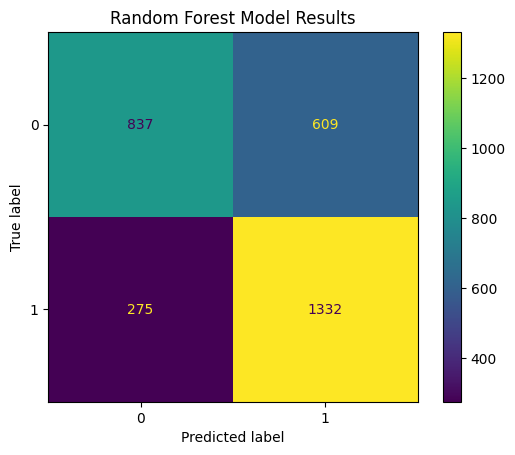

In [71]:
# Generate array of values for confusion matrix
#==> ENTER YOUR CODE HERE
cm = confusion_matrix(y_test, rf_preds, labels=rf_cv.classes_)

# Plot confusion matrix
#==> ENTER YOUR CODE HERE
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_cv.classes_,)
disp.plot(values_format='');
plt.title('Random Forest Model Results')
plt.show()

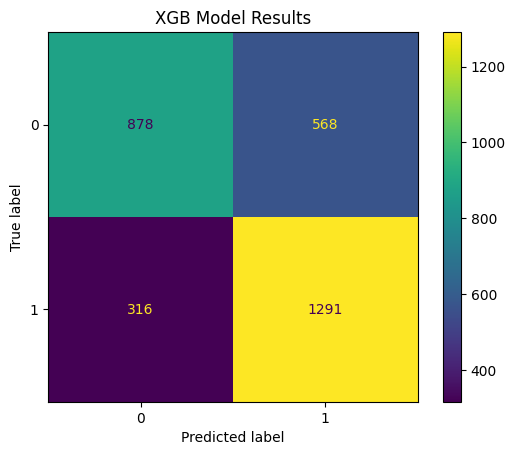

In [57]:
# Generate array of values for confusion matrix
#==> ENTER YOUR CODE HERE
cm = confusion_matrix(y_test, xgb_preds2, labels=xgb_cv2.classes_)

# Plot confusion matrix
#==> ENTER YOUR CODE HERE
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=xgb_cv2.classes_,)

disp.plot(values_format='');
plt.title('XGB Model Results')
plt.show()

**Question:** What type of errors are more common for your model?

0.0

##### Feature importance

Use the `feature_importances_` attribute of the best estimator object to inspect the features of your final model. You can then sort them and plot the most important ones.

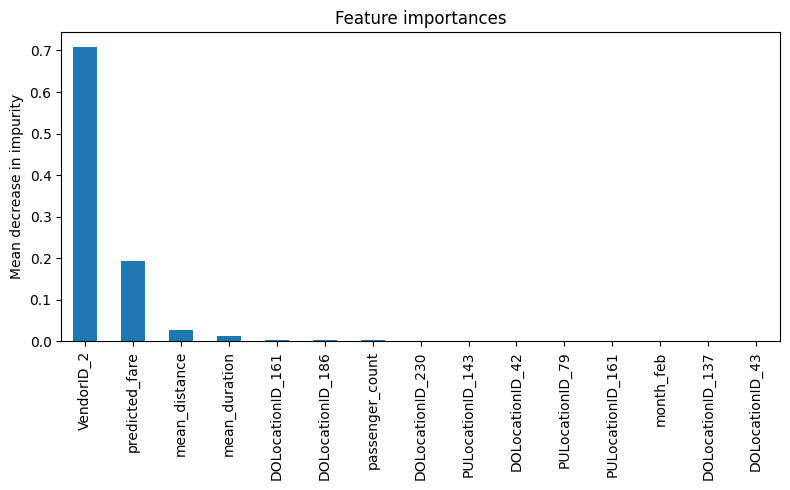

In [123]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  
Yes, this model performs adequately. Its F1 score was 0.750846, and it had an overall accuracy of 0.710449. It correctly identified about 78% of the actual responders in the test set, which is 48% better than a random guess. It might be worthwhile to test the model with a select group of taxi drivers to gather feedback.

2. **What was your model doing? Can you explain how it was making predictions?**   
We know that VendorID, predicted_fare, mean_duration, and mean_distance are the most important features, but we don't yet understand how they influence tipping. This requires further investigation. It's particularly interesting that VendorID is the most predictive feature, suggesting that one of the two vendors tends to attract more generous customers. Conducting statistical tests on the different vendors might be worthwhile to examine this further.

3. **Are there new features that you can engineer that might improve model performance?**   
There's always room for new feautres. Hopefully the most relevant ones were engineered in this project. However, another relevant one could be to divide distance into short, medium or long. Also whether a fare total is closer a whole number or a multiple of 5, which could determine if a person chooses to round up and that determines tip amount.

4. **What features would you want to have that would likely improve the performance of your model?**   
Having data on past tipping behavior for each customer would likely be very beneficial. Additionally, obtaining accurate tip values for customers who pay with cash would be valuable. Increasing the amount of data available would also be advantageous. With sufficient data, we could create unique features for each pickup and drop-off combination.


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.